In [10]:
#Dependencias
import os

# Definir la estructura de carpetas de salida
OUTPUT_DIR = 'results'
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Carpeta de resultados creada en: {OUTPUT_DIR}/")

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, UpSampling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import json

Carpeta de resultados creada en: results/


In [11]:
def plot_history_and_save_metrics(history, model, x_test, y_test, model_name):
    """Genera gráficas de entrenamiento, Matriz de Confusión y reporte de métricas."""

    # Gráfica de Historial (Loss y Accuracy)
    plt.figure(figsize=(12, 4))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss Entrenamiento')
    plt.plot(history.history['val_loss'], label='Loss Validación')
    plt.title(f'Pérdida del Modelo ({model_name})')
    plt.ylabel('Pérdida')
    plt.xlabel('Época')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
    plt.title(f'Precisión del Modelo ({model_name})')
    plt.ylabel('Precisión')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/history_plot_{model_name}.png')
    plt.show() # Mostrar gráfica en la notebook

    # Matriz de Confusión y Reporte de Clasificación
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión ({model_name})')
    plt.colorbar()

    classes = [f'C{i}' for i in range(10)] # CIFAR-10 tiene 10 clases
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Escribir números en las celdas
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/confusion_matrix_{model_name}.png')
    plt.show()

    # Reporte de Clasificación (Precision, Recall, F1)
    report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)

    with open(f'{OUTPUT_DIR}/metrics_{model_name}.json', 'w') as f:
        json.dump(report, f, indent=4)

    print(f"\nMétricas detalladas para {model_name} guardadas en {OUTPUT_DIR}/.")
    print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

In [12]:
# Carga de datos. Preestablecidos. No necesario directorio data/
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalización
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-Hot Encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

input_shape = x_train.shape[1:]
print(f"Datos cargados. Forma de entrada: {input_shape}")

Datos cargados. Forma de entrada: (32, 32, 3)


Modelo 1: CNN Desde Cero


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3569 - loss: 1.7356 - val_accuracy: 0.5407 - val_loss: 1.3159
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5795 - loss: 1.1799 - val_accuracy: 0.6212 - val_loss: 1.0681
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6417 - loss: 1.0194 - val_accuracy: 0.6479 - val_loss: 1.0008
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6837 - loss: 0.9013 - val_accuracy: 0.6808 - val_loss: 0.9169
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 46ms/step - accuracy: 0.7070 - loss: 0.8308 - val_accuracy: 0.6703 - val_loss: 0.9486
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7311 - loss: 0.7648 - val_accuracy: 0.6860 - val_loss: 0.9053
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7540 - loss: 0.6973 - val_accuracy: 0.6860 - val_loss: 0.9144
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7698 

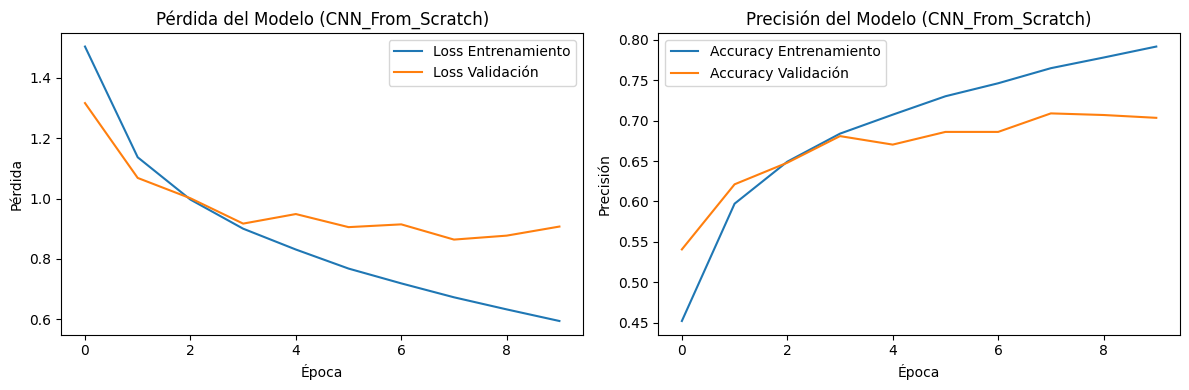

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


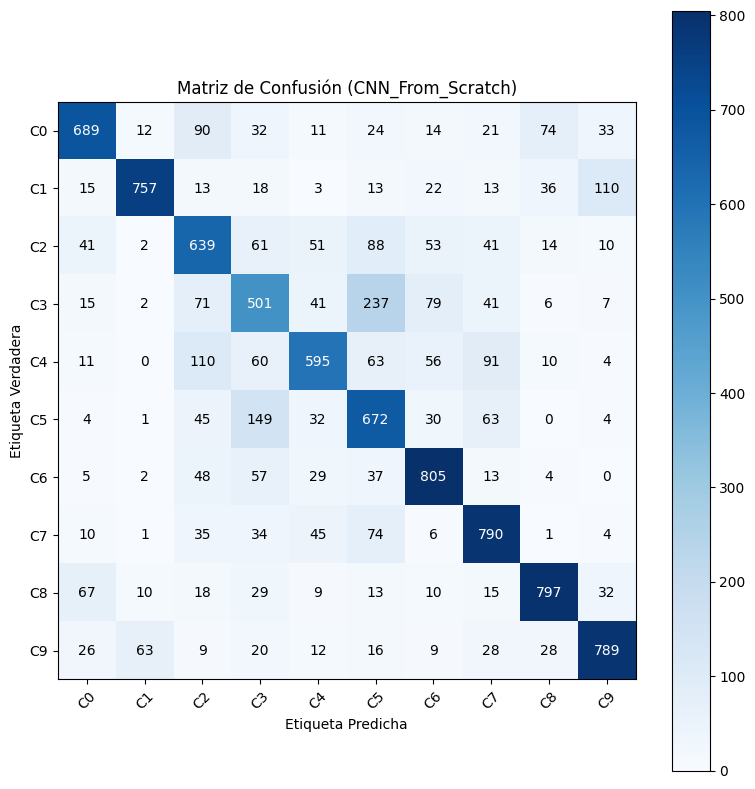


Métricas detalladas para CNN_From_Scratch guardadas en results/.
              precision    recall  f1-score   support

          C0       0.78      0.69      0.73      1000
          C1       0.89      0.76      0.82      1000
          C2       0.59      0.64      0.62      1000
          C3       0.52      0.50      0.51      1000
          C4       0.72      0.59      0.65      1000
          C5       0.54      0.67      0.60      1000
          C6       0.74      0.81      0.77      1000
          C7       0.71      0.79      0.75      1000
          C8       0.82      0.80      0.81      1000
          C9       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [13]:
print("Modelo 1: CNN Desde Cero")

# Construcción
model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_scratch.summary()

# Entrenamiento
history_scratch = model_scratch.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1 # Muestra el progreso
)

# Guardar y generar métricas
model_scratch.save(f'{OUTPUT_DIR}/model_scratch.h5')

#Generación métricas y Gráficas
#Modelo 1 CNN Desde Cero (From Scratch)
plot_history_and_save_metrics(history_scratch, model_scratch, x_test, y_test, model_name='CNN_From_Scratch')

Modelo 2: Fine-Tuning (MobileNetV2)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 424s 268ms/step - accuracy: 0.6913 - loss: 0.9057 - val_accuracy: 0.7788 - val_loss: 0.6434
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 424s 257ms/step - accuracy: 0.7993 - loss: 0.5759 - val_accuracy: 0.7904 - val_loss: 0.6097
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 416s 266ms/step - accuracy: 0.8266 - loss: 0.4922 - val_accuracy: 0.7993 - val_loss: 0.5874
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 414s 265ms/step - accuracy: 0.8502 - loss: 0.4214 - val_accuracy: 0.7880 - val_loss: 0.6268
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 415s 265ms/step - accuracy: 0.8693 - loss: 0.3631 - val_accuracy: 0.7992 - val_loss: 0.6290


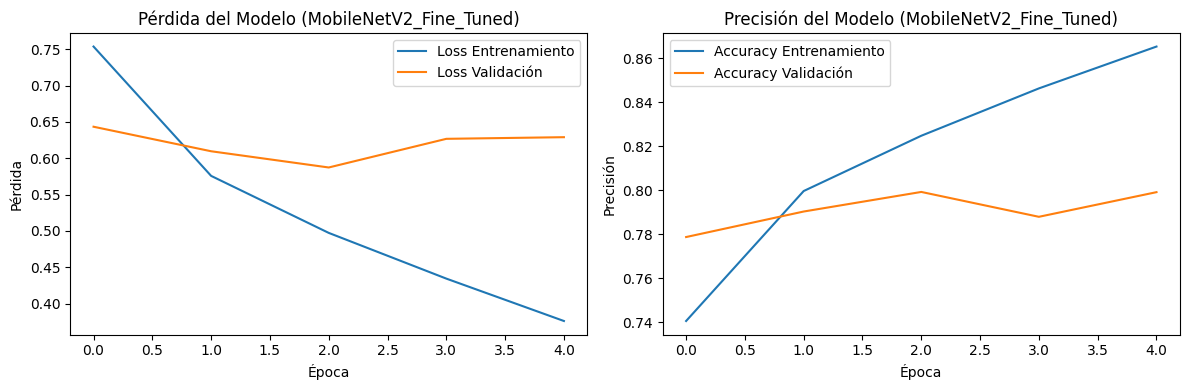

313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 210ms/step


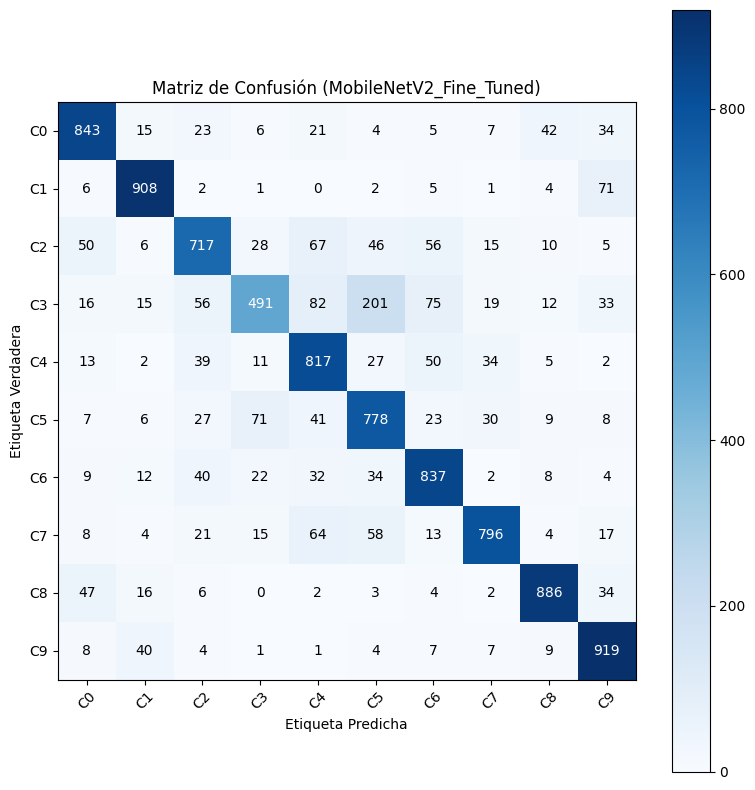


Métricas detalladas para MobileNetV2_Fine_Tuned guardadas en results/.
              precision    recall  f1-score   support

          C0       0.84      0.84      0.84      1000
          C1       0.89      0.91      0.90      1000
          C2       0.77      0.72      0.74      1000
          C3       0.76      0.49      0.60      1000
          C4       0.72      0.82      0.77      1000
          C5       0.67      0.78      0.72      1000
          C6       0.78      0.84      0.81      1000
          C7       0.87      0.80      0.83      1000
          C8       0.90      0.89      0.89      1000
          C9       0.82      0.92      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [15]:
print("Modelo 2: Fine-Tuning (MobileNetV2)")

# El modelo MobileNetV2 requiere una entrada de al menos 32x32, usando 96x96 es más común.
TARGET_SIZE = (96, 96, 3)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=TARGET_SIZE
)

# Congelar la base
base_model.trainable = False

# Crear el nuevo modelo (incluye re-escalado)
inputs = tf.keras.Input(shape=input_shape)
x = UpSampling2D(size=(int(TARGET_SIZE[0]/input_shape[0]), int(TARGET_SIZE[1]/input_shape[1])))(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_finetuned = Model(inputs, outputs)

model_finetuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_finetuned.summary()

# Entrenamiento (Transfer Learning)
history_finetuned = model_finetuned.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=1
)

# Guardar y generar métricas
model_finetuned.save(f'{OUTPUT_DIR}/model_finetuned.h5')

#Generación Métricas y Gráficas
plot_history_and_save_metrics(history_finetuned, model_finetuned, x_test, y_test, model_name='MobileNetV2_Fine_Tuned')